In [1]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

/usr/bin/sh: 1: sudo: not found
/usr/bin/sh: 1: sudo: not found
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from manim import *

In [3]:
%%manim -qm -v WARNING SquareToCircle

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

Manim Community v0.18.1

In [4]:
%%manim -qm -v WARNING DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2 * LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2 * RIGHT)
        self.play(
            left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2
        )
        self.wait()

Manim Community v0.18.1

In [5]:
%%manim -qm -v WARNING TwoTransforms

class TwoTransforms(Scene):
    def transform(self):
        a = Circle()
        b = Square()
        c = Triangle()
        self.play(Transform(a, b))
        self.play(Transform(a, c))
        self.play(FadeOut(a))

    def replacement_transform(self):
        a = Circle()
        b = Square()
        c = Triangle()
        self.play(ReplacementTransform(a, b))
        self.play(ReplacementTransform(b, c))
        self.play(FadeOut(c))

    def construct(self):
        self.transform()
        self.wait(0.5)  # wait for 0.5 seconds
        self.replacement_transform()

Manim Community v0.18.1

Manim Community v0.18.1

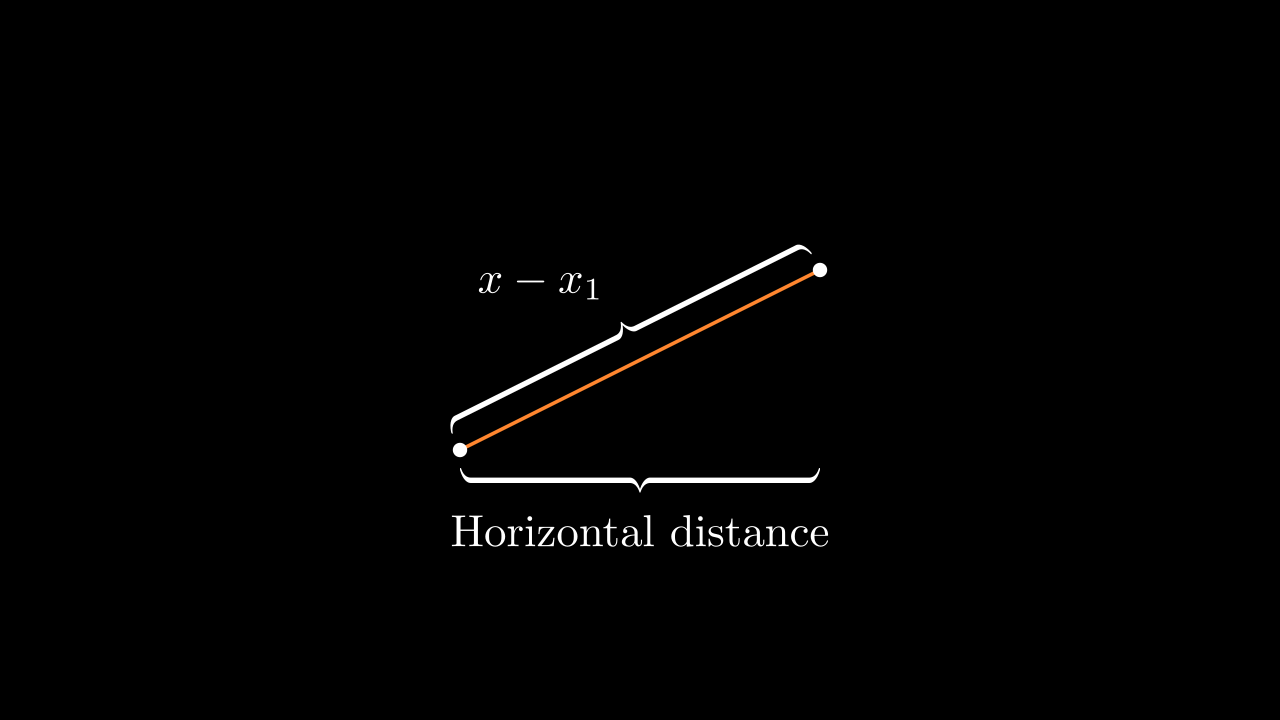

In [6]:
%%manim -qm -v WARNING BraceAnnotation

class BraceAnnotation(Scene):
    def construct(self):
        dot = Dot([-2, -1, 0])
        dot2 = Dot([2, 1, 0])
        line = Line(dot.get_center(), dot2.get_center()).set_color(ORANGE)
        b1 = Brace(line)
        b1text = b1.get_text("Horizontal distance")
        b2 = Brace(line, direction=line.copy().rotate(PI / 2).get_unit_vector())
        b2text = b2.get_tex("x-x_1")
        self.add(line, dot, dot2, b1, b2, b1text, b2text)

Manim Community v0.18.1

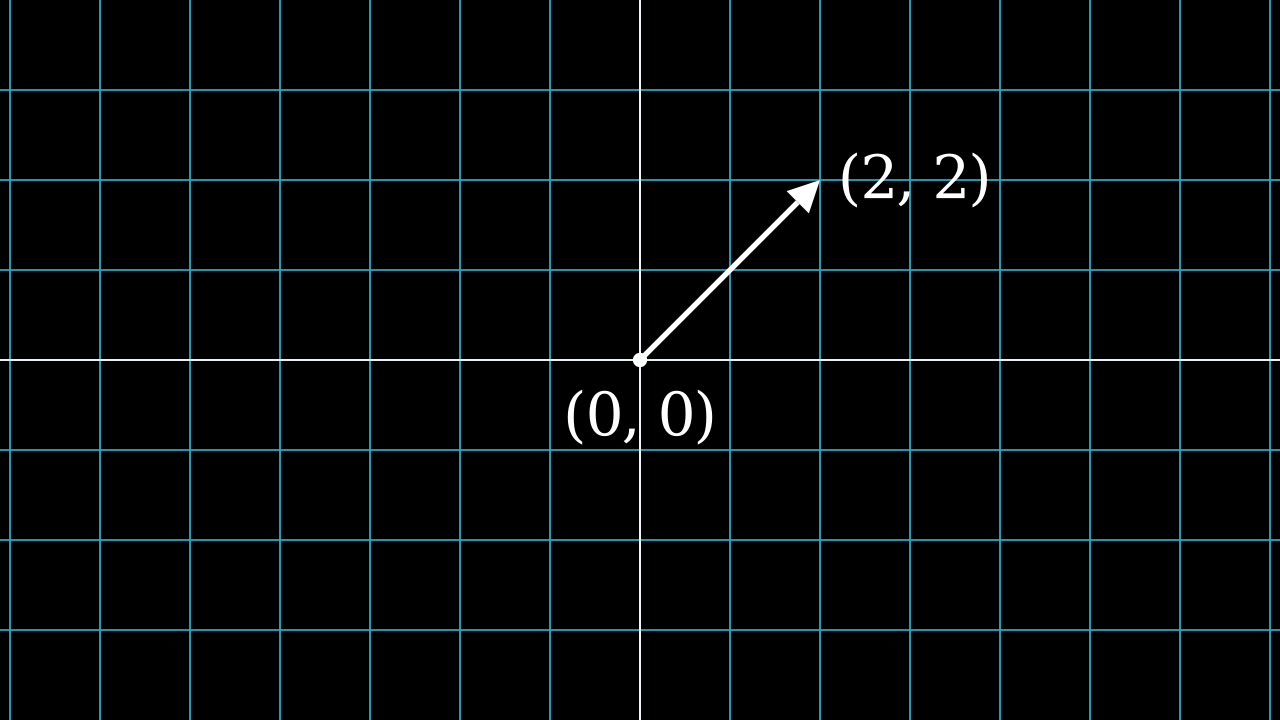

In [7]:
%%manim -qm -v WARNING VectorArrow

class VectorArrow(Scene):
    def construct(self):
        dot = Dot(ORIGIN)
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)
        numberplane = NumberPlane()
        origin_text = Text('(0, 0)').next_to(dot, DOWN)
        tip_text = Text('(2, 2)').next_to(arrow.get_end(), RIGHT)
        self.add(numberplane, dot, arrow, origin_text, tip_text)

Manim Community v0.18.1

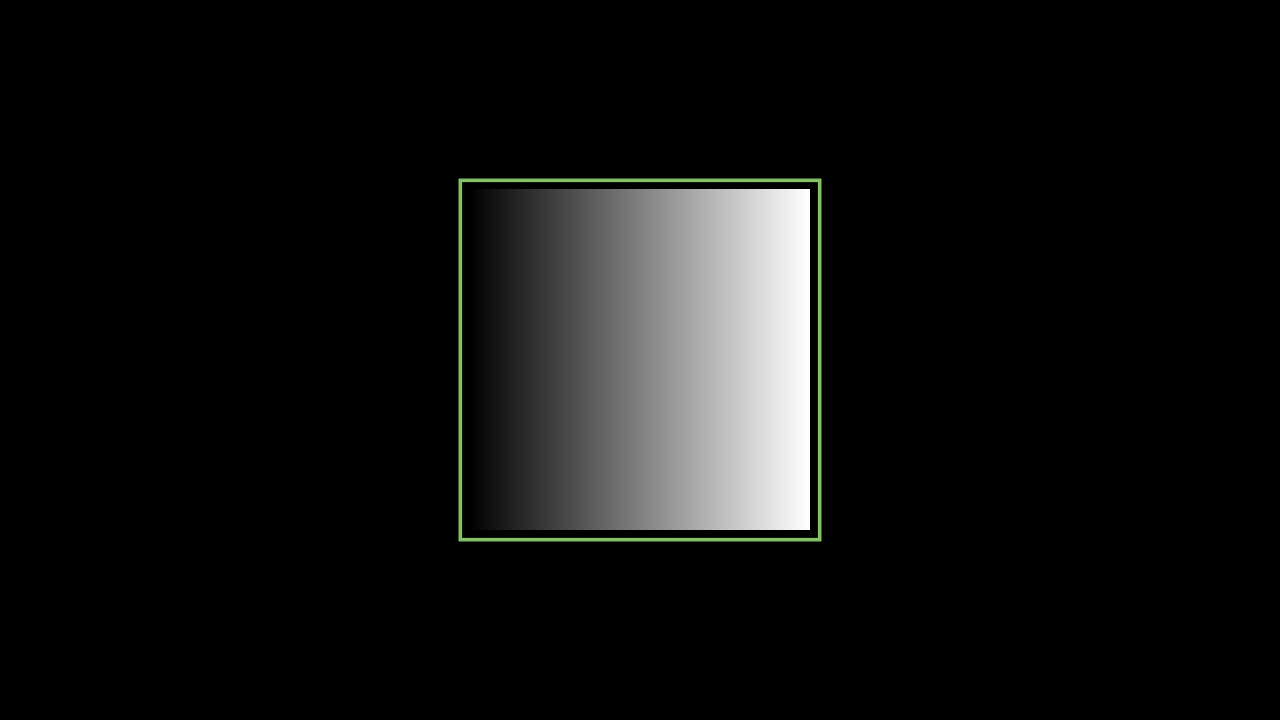

In [8]:
%%manim -qm -v WARNING GradientImageFromArray

class GradientImageFromArray(Scene):
    def construct(self):
        n = 256
        imageArray = np.uint8(
            [[i * 256 / n for i in range(0, n)] for _ in range(0, n)]
        )
        image = ImageMobject(imageArray).scale(2)
        image.background_rectangle = SurroundingRectangle(image, GREEN)
        self.add(image, image.background_rectangle)

In [9]:
%%manim -qm -v WARNING BooleanOperations

class BooleanOperations(Scene):
    def construct(self):
        ellipse1 = Ellipse(
            width=4.0, height=5.0, fill_opacity=0.5, color=BLUE, stroke_width=10
        ).move_to(LEFT)
        ellipse2 = ellipse1.copy().set_color(color=RED).move_to(RIGHT)
        bool_ops_text = MarkupText("<u>Boolean Operation</u>").next_to(ellipse1, UP * 3)
        ellipse_group = Group(bool_ops_text, ellipse1, ellipse2).move_to(LEFT * 3)
        self.play(FadeIn(ellipse_group))

        i = Intersection(ellipse1, ellipse2, color=GREEN, fill_opacity=0.5)
        self.play(i.animate.scale(0.25).move_to(RIGHT * 5 + UP * 2.5))
        intersection_text = Text("Intersection", font_size=23).next_to(i, UP)
        self.play(FadeIn(intersection_text))

        u = Union(ellipse1, ellipse2, color=ORANGE, fill_opacity=0.5)
        union_text = Text("Union", font_size=23)
        self.play(u.animate.scale(0.3).next_to(i, DOWN, buff=union_text.height * 3))
        union_text.next_to(u, UP)
        self.play(FadeIn(union_text))

        e = Exclusion(ellipse1, ellipse2, color=YELLOW, fill_opacity=0.5)
        exclusion_text = Text("Exclusion", font_size=23)
        self.play(e.animate.scale(0.3).next_to(u, DOWN, buff=exclusion_text.height * 3.5))
        exclusion_text.next_to(e, UP)
        self.play(FadeIn(exclusion_text))

        d = Difference(ellipse1, ellipse2, color=PINK, fill_opacity=0.5)
        difference_text = Text("Difference", font_size=23)
        self.play(d.animate.scale(0.3).next_to(u, LEFT, buff=difference_text.height * 3.5))
        difference_text.next_to(d, UP)
        self.play(FadeIn(difference_text))

Manim Community v0.18.1

In [10]:
%%manim -qm -v WARNING PointMovingOnShapes

class PointMovingOnShapes(Scene):
    def construct(self):
        circle = Circle(radius=1, color=BLUE)
        dot = Dot()
        dot2 = dot.copy().shift(RIGHT)
        self.add(dot)

        line = Line([3, 0, 0], [5, 0, 0])
        self.add(line)

        self.play(GrowFromCenter(circle))
        self.play(Transform(dot, dot2))
        self.play(MoveAlongPath(dot, circle), run_time=2, rate_func=linear)
        self.play(Rotating(dot, about_point=[2, 0, 0]), run_time=1.5)
        self.wait()

Manim Community v0.18.1

In [11]:
%%manim -qm -v WARNING MovingAround

class MovingAround(Scene):
    def construct(self):
        square = Square(color=BLUE, fill_opacity=1)

        self.play(square.animate.shift(LEFT))
        self.play(square.animate.set_fill(ORANGE))
        self.play(square.animate.scale(0.3))
        self.play(square.animate.rotate(0.4))

Manim Community v0.18.1

In [12]:
%%manim -qm -v WARNING MovingAngle

class MovingAngle(Scene):
    def construct(self):
        rotation_center = LEFT

        theta_tracker = ValueTracker(110)
        line1 = Line(LEFT, RIGHT)
        line_moving = Line(LEFT, RIGHT)
        line_ref = line_moving.copy()
        line_moving.rotate(
            theta_tracker.get_value() * DEGREES, about_point=rotation_center
        )
        a = Angle(line1, line_moving, radius=0.5, other_angle=False)
        tex = MathTex(r"\theta").move_to(
            Angle(
                line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
            ).point_from_proportion(0.5)
        )

        self.add(line1, line_moving, a, tex)
        self.wait()

        line_moving.add_updater(
            lambda x: x.become(line_ref.copy()).rotate(
                theta_tracker.get_value() * DEGREES, about_point=rotation_center
            )
        )

        a.add_updater(
            lambda x: x.become(Angle(line1, line_moving, radius=0.5, other_angle=False))
        )
        tex.add_updater(
            lambda x: x.move_to(
                Angle(
                    line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
                ).point_from_proportion(0.5)
            )
        )

        self.play(theta_tracker.animate.set_value(40))
        self.play(theta_tracker.animate.increment_value(140))
        self.play(tex.animate.set_color(RED), run_time=0.5)
        self.play(theta_tracker.animate.set_value(350))

Manim Community v0.18.1

In [13]:
%%manim -qm -v WARNING MovingDots

class MovingDots(Scene):
    def construct(self):
        d1,d2=Dot(color=BLUE),Dot(color=GREEN)
        dg=VGroup(d1,d2).arrange(RIGHT,buff=1)
        l1=Line(d1.get_center(),d2.get_center()).set_color(RED)
        x=ValueTracker(0)
        y=ValueTracker(0)
        d1.add_updater(lambda z: z.set_x(x.get_value()))
        d2.add_updater(lambda z: z.set_y(y.get_value()))
        l1.add_updater(lambda z: z.become(Line(d1.get_center(),d2.get_center())))
        self.add(d1,d2,l1)
        self.play(x.animate.set_value(5))
        self.play(y.animate.set_value(4))
        self.wait()

Manim Community v0.18.1

In [14]:
%%manim -qm -v WARNING MovingGroupToDestination

class MovingGroupToDestination(Scene):
    def construct(self):
        group = VGroup(Dot(LEFT), Dot(ORIGIN), Dot(RIGHT, color=RED), Dot(2 * RIGHT)).scale(1.4)
        dest = Dot([4, 3, 0], color=YELLOW)
        self.add(group, dest)
        self.play(group.animate.shift(dest.get_center() - group[2].get_center()))
        self.wait(0.5)

Manim Community v0.18.1

In [15]:
%%manim -qm -v WARNING MovingFrameBox

class MovingFrameBox(Scene):
    def construct(self):
        text=MathTex(
            "\\frac{d}{dx}f(x)g(x)=","f(x)\\frac{d}{dx}g(x)","+",
            "g(x)\\frac{d}{dx}f(x)"
        )
        self.play(Write(text))
        framebox1 = SurroundingRectangle(text[1], buff = .1)
        framebox2 = SurroundingRectangle(text[3], buff = .1)
        self.play(
            Create(framebox1),
        )
        self.wait()
        self.play(
            ReplacementTransform(framebox1,framebox2),
        )
        self.wait()

Manim Community v0.18.1

In [16]:
%%manim -qm -v WARNING RotationUpdater

class RotationUpdater(Scene):
    def construct(self):
        def updater_forth(mobj, dt):
            mobj.rotate_about_origin(dt)
        def updater_back(mobj, dt):
            mobj.rotate_about_origin(-dt)
        line_reference = Line(ORIGIN, LEFT).set_color(WHITE)
        line_moving = Line(ORIGIN, LEFT).set_color(YELLOW)
        line_moving.add_updater(updater_forth)
        self.add(line_reference, line_moving)
        self.wait(2)
        line_moving.remove_updater(updater_forth)
        line_moving.add_updater(updater_back)
        self.wait(2)
        line_moving.remove_updater(updater_back)
        self.wait(0.5)

Manim Community v0.18.1

In [17]:
%%manim -qm -v WARNING PointWithTrace

class PointWithTrace(Scene):
    def construct(self):
        path = VMobject()
        dot = Dot()
        path.set_points_as_corners([dot.get_center(), dot.get_center()])
        def update_path(path):
            previous_path = path.copy()
            previous_path.add_points_as_corners([dot.get_center()])
            path.become(previous_path)
        path.add_updater(update_path)
        self.add(path, dot)
        self.play(Rotating(dot, radians=PI, about_point=RIGHT, run_time=2))
        self.wait()
        self.play(dot.animate.shift(UP))
        self.play(dot.animate.shift(LEFT))
        self.wait()

Manim Community v0.18.1

Manim Community v0.18.1

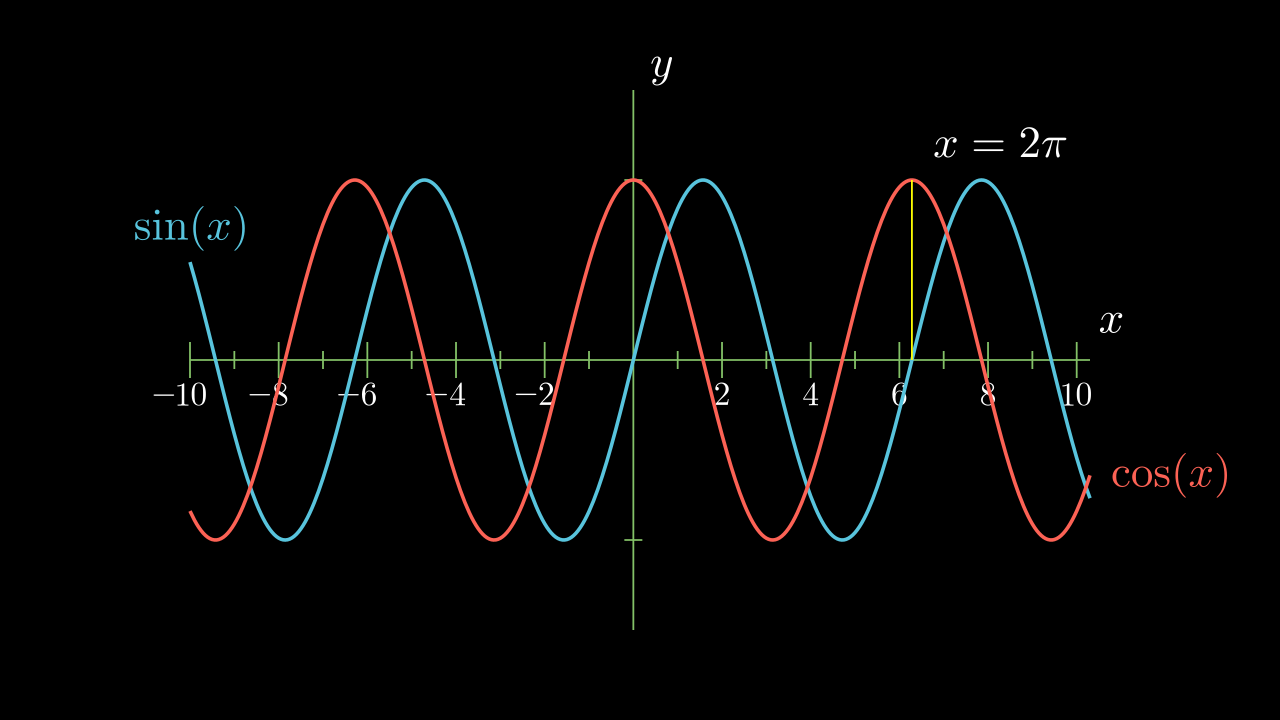

In [18]:
%%manim -qm -v WARNING SinAndCosFunctionPlot

class SinAndCosFunctionPlot(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-10, 10.3, 1],
            y_range=[-1.5, 1.5, 1],
            x_length=10,
            axis_config={"color": GREEN},
            x_axis_config={
                "numbers_to_include": np.arange(-10, 10.01, 2),
                "numbers_with_elongated_ticks": np.arange(-10, 10.01, 2),
            },
            tips=False,
        )
        axes_labels = axes.get_axis_labels()
        sin_graph = axes.plot(lambda x: np.sin(x), color=BLUE)
        cos_graph = axes.plot(lambda x: np.cos(x), color=RED)

        sin_label = axes.get_graph_label(
            sin_graph, "\\sin(x)", x_val=-10, direction=UP / 2
        )
        cos_label = axes.get_graph_label(cos_graph, label="\\cos(x)")

        vert_line = axes.get_vertical_line(
            axes.i2gp(TAU, cos_graph), color=YELLOW, line_func=Line
        )
        line_label = axes.get_graph_label(
            cos_graph, "x=2\pi", x_val=TAU, direction=UR, color=WHITE
        )

        plot = VGroup(axes, sin_graph, cos_graph, vert_line)
        labels = VGroup(axes_labels, sin_label, cos_label, line_label)
        self.add(plot, labels)

In [19]:
%%manim -qm -v WARNING ArgMinExample

class ArgMinExample(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 10], y_range=[0, 100, 10], axis_config={"include_tip": False}
        )
        labels = ax.get_axis_labels(x_label="x", y_label="f(x)")

        t = ValueTracker(0)

        def func(x):
            return 2 * (x - 5) ** 2
        graph = ax.plot(func, color=MAROON)

        initial_point = [ax.coords_to_point(t.get_value(), func(t.get_value()))]
        dot = Dot(point=initial_point)

        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), func(t.get_value()))))
        x_space = np.linspace(*ax.x_range[:2],200)
        minimum_index = func(x_space).argmin()

        self.add(ax, labels, graph, dot)
        self.play(t.animate.set_value(x_space[minimum_index]))
        self.wait()

Manim Community v0.18.1

Manim Community v0.18.1

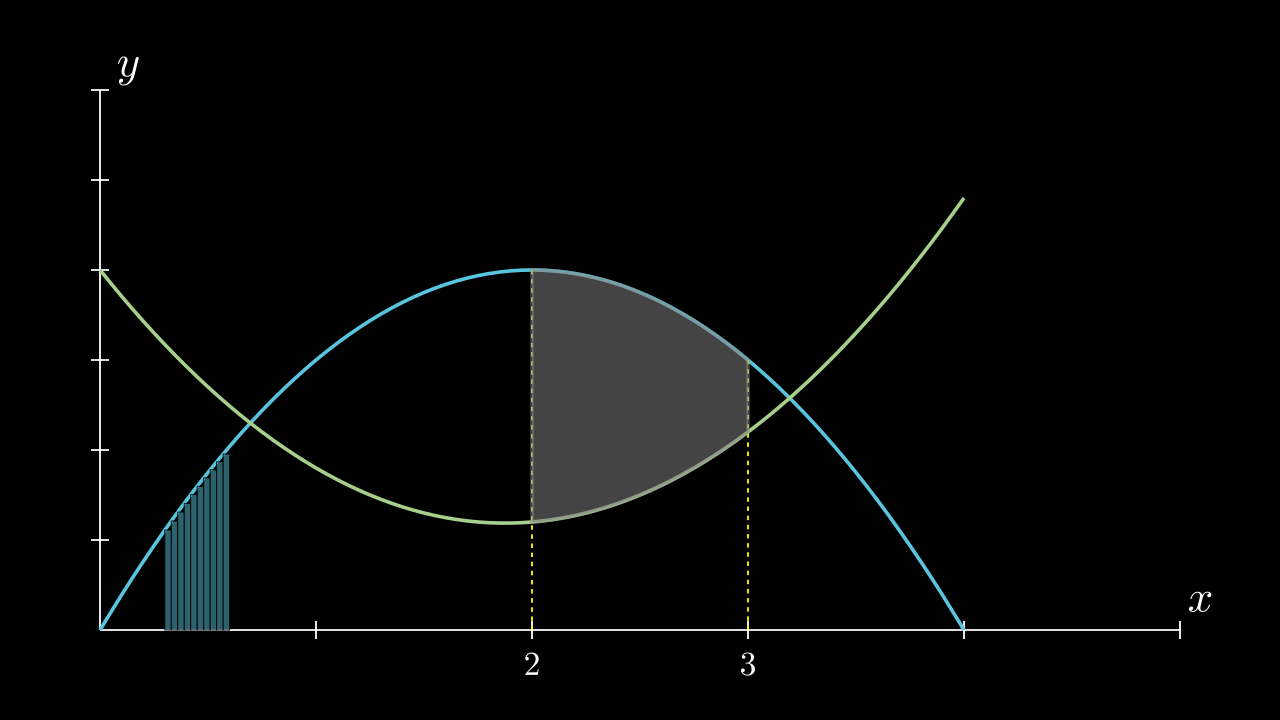

In [20]:
%%manim -qm -v WARNING GraphAreaPlot

class GraphAreaPlot(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 5],
            y_range=[0, 6],
            x_axis_config={"numbers_to_include": [2, 3]},
            tips=False,
        )

        labels = ax.get_axis_labels()

        curve_1 = ax.plot(lambda x: 4 * x - x ** 2, x_range=[0, 4], color=BLUE_C)
        curve_2 = ax.plot(
            lambda x: 0.8 * x ** 2 - 3 * x + 4,
            x_range=[0, 4],
            color=GREEN_B,
        )

        line_1 = ax.get_vertical_line(ax.input_to_graph_point(2, curve_1), color=YELLOW)
        line_2 = ax.get_vertical_line(ax.i2gp(3, curve_1), color=YELLOW)

        riemann_area = ax.get_riemann_rectangles(curve_1, x_range=[0.3, 0.6], dx=0.03, color=BLUE, fill_opacity=0.5)
        area = ax.get_area(curve_2, [2, 3], bounded_graph=curve_1, color=GREY, opacity=0.5)

        self.add(ax, labels, curve_1, curve_2, line_1, line_2, riemann_area, area)

In [21]:
%%manim -qm -v WARNING PolygonOnAxes

class PolygonOnAxes(Scene):
    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]

    def construct(self):
        ax = Axes(
            x_range=[0, 10],
            y_range=[0, 10],
            x_length=6,
            y_length=6,
            axis_config={"include_tip": False},
        )

        t = ValueTracker(5)
        k = 25

        graph = ax.plot(
            lambda x: k / x,
            color=YELLOW_D,
            x_range=[k / 10, 10.0, 0.01],
            use_smoothing=False,
        )

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (t.get_value(), k / t.get_value())
                    )
                ]
            )
            polygon.stroke_width = 1
            polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon

        polygon = always_redraw(get_rectangle)

        dot = Dot()
        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), k / t.get_value())))
        dot.set_z_index(10)

        self.add(ax, graph, dot)
        self.play(Create(polygon))
        self.play(t.animate.set_value(10))
        self.play(t.animate.set_value(k / 10))
        self.play(t.animate.set_value(5))

Manim Community v0.18.1

Manim Community v0.18.1

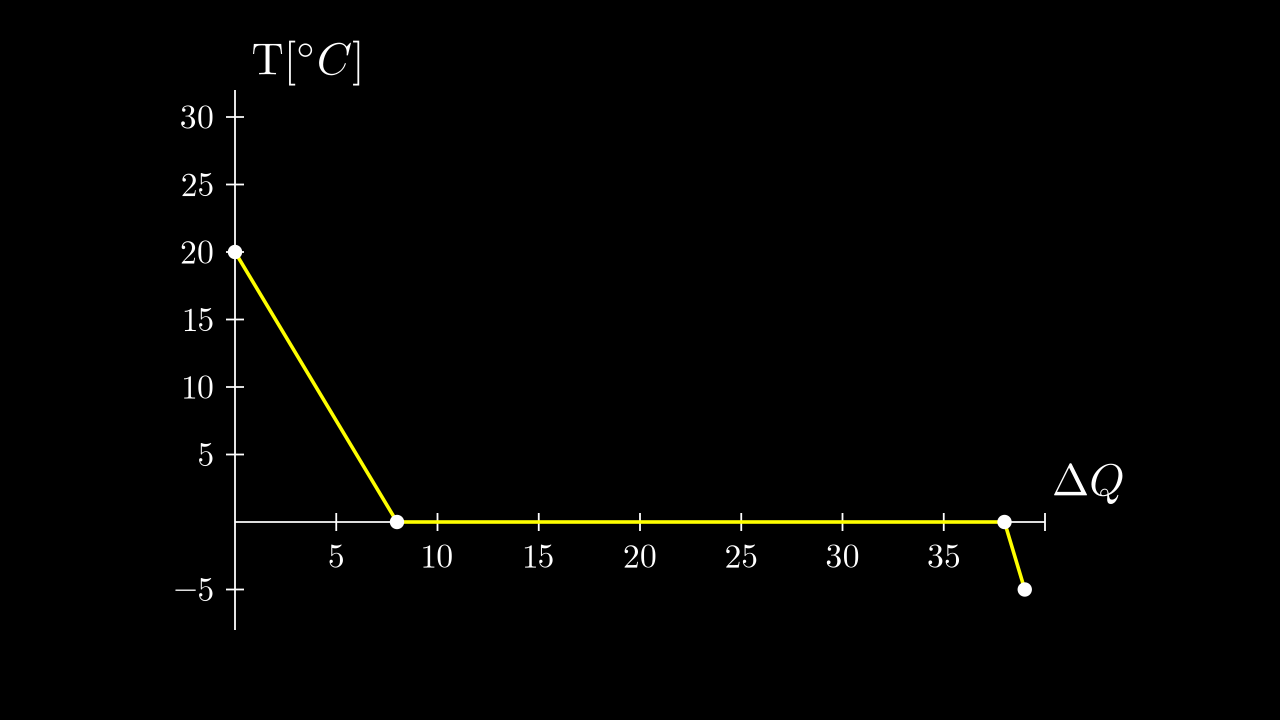

In [22]:
%%manim -qm -v WARNING HeatDiagramPlot

class HeatDiagramPlot(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 40, 5],
            y_range=[-8, 32, 5],
            x_length=9,
            y_length=6,
            x_axis_config={"numbers_to_include": np.arange(0, 40, 5)},
            y_axis_config={"numbers_to_include": np.arange(-5, 34, 5)},
            tips=False,
        )
        labels = ax.get_axis_labels(
            x_label=Tex("$\Delta Q$"), y_label=Tex("T[$^\circ C$]")
        )

        x_vals = [0, 8, 38, 39]
        y_vals = [20, 0, 0, -5]
        graph = ax.plot_line_graph(x_values=x_vals, y_values=y_vals)

        self.add(ax, labels, graph)

In [23]:
%%manim -qm -v WARNING FollowingGraphCamera

class FollowingGraphCamera(MovingCameraScene):
    def construct(self):
        self.camera.frame.save_state()

        # create the axes and the curve
        ax = Axes(x_range=[-1, 10], y_range=[-1, 10])
        graph = ax.plot(lambda x: np.sin(x), color=BLUE, x_range=[0, 3 * PI])

        # create dots based on the graph
        moving_dot = Dot(ax.i2gp(graph.t_min, graph), color=ORANGE)
        dot_1 = Dot(ax.i2gp(graph.t_min, graph))
        dot_2 = Dot(ax.i2gp(graph.t_max, graph))

        self.add(ax, graph, dot_1, dot_2, moving_dot)
        self.play(self.camera.frame.animate.scale(0.5).move_to(moving_dot))

        def update_curve(mob):
            mob.move_to(moving_dot.get_center())

        self.camera.frame.add_updater(update_curve)
        self.play(MoveAlongPath(moving_dot, graph, rate_func=linear))
        self.camera.frame.remove_updater(update_curve)

        self.play(Restore(self.camera.frame))

Manim Community v0.18.1

In [24]:
%%manim -qm -v WARNING MovingZoomedSceneAround

class MovingZoomedSceneAround(ZoomedScene):
# contributed by TheoremofBeethoven, www.youtube.com/c/TheoremofBeethoven
    def __init__(self, **kwargs):
        ZoomedScene.__init__(
            self,
            zoom_factor=0.3,
            zoomed_display_height=1,
            zoomed_display_width=6,
            image_frame_stroke_width=20,
            zoomed_camera_config={
                "default_frame_stroke_width": 3,
                },
            **kwargs
        )

    def construct(self):
        dot = Dot().shift(UL * 2)
        image = ImageMobject(np.uint8([[0, 100, 30, 200],
                                       [255, 0, 5, 33]]))
        image.height = 7
        frame_text = Text("Frame", color=PURPLE, font_size=67)
        zoomed_camera_text = Text("Zoomed camera", color=RED, font_size=67)

        self.add(image, dot)
        zoomed_camera = self.zoomed_camera
        zoomed_display = self.zoomed_display
        frame = zoomed_camera.frame
        zoomed_display_frame = zoomed_display.display_frame

        frame.move_to(dot)
        frame.set_color(PURPLE)
        zoomed_display_frame.set_color(RED)
        zoomed_display.shift(DOWN)

        zd_rect = BackgroundRectangle(zoomed_display, fill_opacity=0, buff=MED_SMALL_BUFF)
        self.add_foreground_mobject(zd_rect)

        unfold_camera = UpdateFromFunc(zd_rect, lambda rect: rect.replace(zoomed_display))

        frame_text.next_to(frame, DOWN)

        self.play(Create(frame), FadeIn(frame_text, shift=UP))
        self.activate_zooming()

        self.play(self.get_zoomed_display_pop_out_animation(), unfold_camera)
        zoomed_camera_text.next_to(zoomed_display_frame, DOWN)
        self.play(FadeIn(zoomed_camera_text, shift=UP))
        # Scale in        x   y  z
        scale_factor = [0.5, 1.5, 0]
        self.play(
            frame.animate.scale(scale_factor),
            zoomed_display.animate.scale(scale_factor),
            FadeOut(zoomed_camera_text),
            FadeOut(frame_text)
        )
        self.wait()
        self.play(ScaleInPlace(zoomed_display, 2))
        self.wait()
        self.play(frame.animate.shift(2.5 * DOWN))
        self.wait()
        self.play(self.get_zoomed_display_pop_out_animation(), unfold_camera, rate_func=lambda t: smooth(1 - t))
        self.play(Uncreate(zoomed_display_frame), FadeOut(frame))
        self.wait()

Manim Community v0.18.1

In [25]:
%%manim -qm -v WARNING FixedInFrameMObjectTest

class FixedInFrameMObjectTest(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        self.set_camera_orientation(phi=75 * DEGREES, theta=-45 * DEGREES)
        text3d = Text("This is a 3D text")
        self.add_fixed_in_frame_mobjects(text3d)
        text3d.to_corner(UL)
        self.add(axes)
        self.wait()

Manim Community v0.18.1

Manim Community v0.18.1

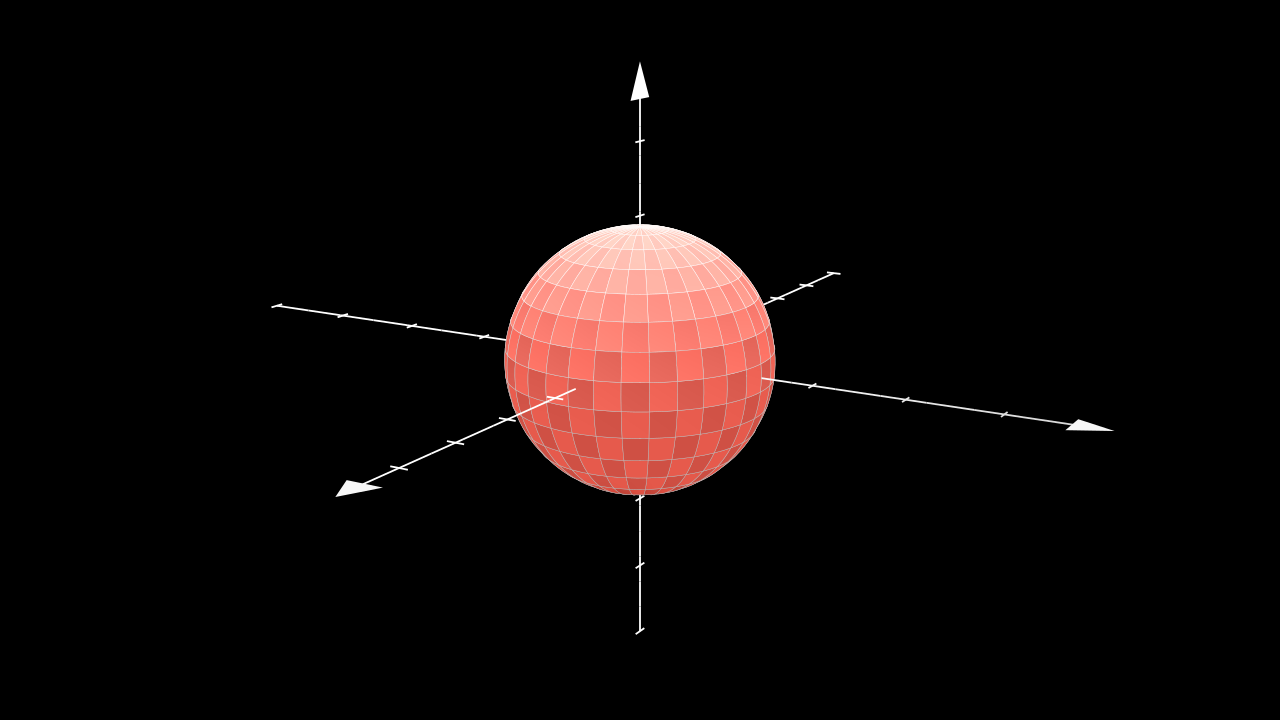

In [26]:
%%manim -qm -v WARNING ThreeDLightSourcePosition

class ThreeDLightSourcePosition(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        sphere = Surface(
            lambda u, v: np.array([
                1.5 * np.cos(u) * np.cos(v),
                1.5 * np.cos(u) * np.sin(v),
                1.5 * np.sin(u)
            ]), v_range=[0, TAU], u_range=[-PI / 2, PI / 2],
            checkerboard_colors=[RED_D, RED_E], resolution=(15, 32)
        )
        self.renderer.camera.light_source.move_to(3*IN) # changes the source of the light
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(axes, sphere)

In [27]:
%%manim -qm -v WARNING ThreeDCameraRotation

class ThreeDCameraRotation(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        circle=Circle()
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(circle,axes)
        self.begin_ambient_camera_rotation(rate=0.1)
        self.wait()
        self.stop_ambient_camera_rotation()
        self.move_camera(phi=75 * DEGREES, theta=30 * DEGREES)
        self.wait()

Manim Community v0.18.1

In [28]:
%%manim -qm -v WARNING ThreeDCameraIllusionRotation

class ThreeDCameraIllusionRotation(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        circle=Circle()
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(circle,axes)
        self.begin_3dillusion_camera_rotation(rate=2)
        self.wait(PI/2)
        self.stop_3dillusion_camera_rotation()

Manim Community v0.18.1

Manim Community v0.18.1

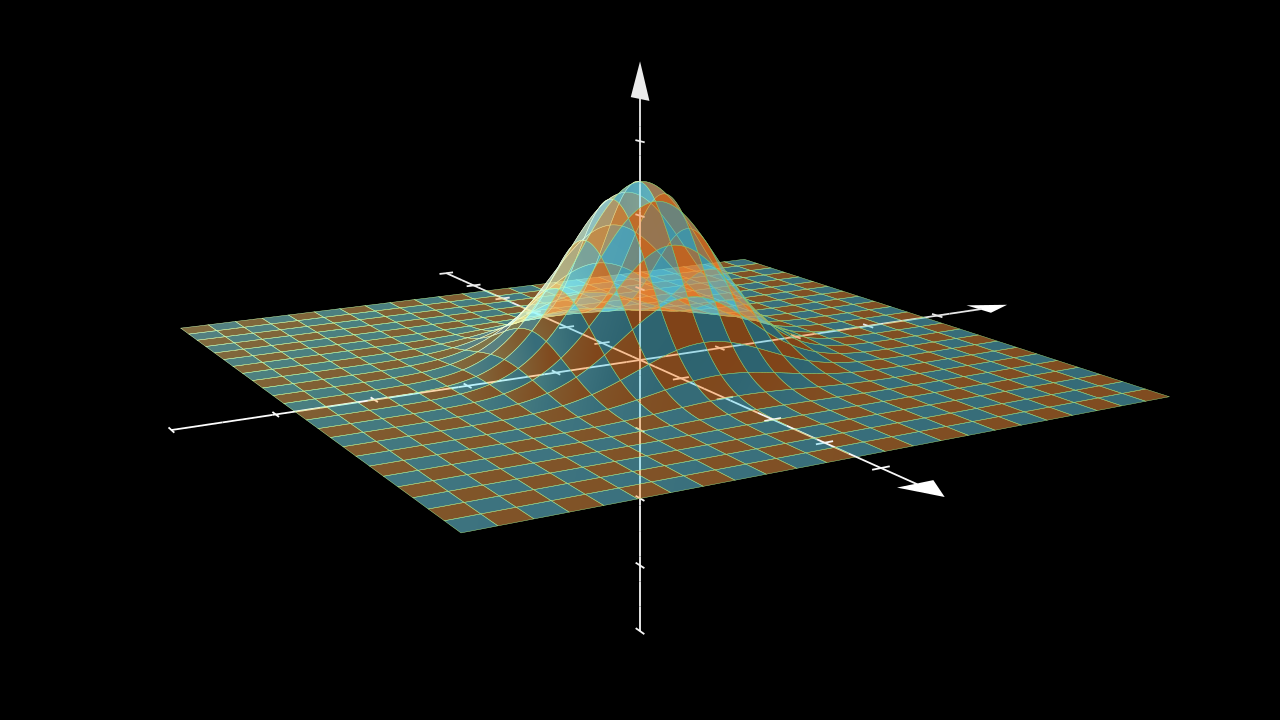

In [29]:
%%manim -qm -v WARNING ThreeDSurfacePlot

class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        resolution_fa = 24
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_gauss(u, v):
            x = u
            y = v
            sigma, mu = 0.4, [0.0, 0.0]
            d = np.linalg.norm(np.array([x - mu[0], y - mu[1]]))
            z = np.exp(-(d ** 2 / (2.0 * sigma ** 2)))
            return np.array([x, y, z])

        gauss_plane = Surface(
            param_gauss,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-2, +2],
            u_range=[-2, +2]
        )

        gauss_plane.scale(2, about_point=ORIGIN)
        gauss_plane.set_style(fill_opacity=1,stroke_color=GREEN)
        gauss_plane.set_fill_by_checkerboard(ORANGE, BLUE, opacity=0.5)
        axes = ThreeDAxes()
        self.add(axes,gauss_plane)

In [30]:
%%manim -qm -v WARNING OpeningManim

class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"This is some \LaTeX")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift=DOWN),
        )
        self.wait()

        transform_title = Tex("That was a transform")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane()
        grid_title = Tex("This is a grid", font_size=72)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)  # Make sure title is on top of grid
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=UP),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"That was a non-linear function \\ applied to the grid"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p
                          + np.array(
                    [
                        np.sin(p[1]),
                        np.sin(p[0]),
                        0,
                    ]
                )
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()

Manim Community v0.18.1

In [31]:
%%manim -qm -v WARNING SineCurveUnitCircle

class SineCurveUnitCircle(Scene):
    # contributed by heejin_park, https://infograph.tistory.com/230
    def construct(self):
        self.show_axis()
        self.show_circle()
        self.move_dot_and_draw_curve()
        self.wait()

    def show_axis(self):
        x_start = np.array([-6,0,0])
        x_end = np.array([6,0,0])

        y_start = np.array([-4,-2,0])
        y_end = np.array([-4,2,0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        self.add(x_axis, y_axis)
        self.add_x_labels()

        self.origin_point = np.array([-4,0,0])
        self.curve_start = np.array([-3,0,0])

    def add_x_labels(self):
        x_labels = [
            MathTex("\pi"), MathTex("2 \pi"),
            MathTex("3 \pi"), MathTex("4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2*i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def show_circle(self):
        circle = Circle(radius=1)
        circle.move_to(self.origin_point)
        self.add(circle)
        self.circle = circle

    def move_dot_and_draw_curve(self):
        orbit = self.circle
        origin_point = self.origin_point

        dot = Dot(radius=0.08, color=YELLOW)
        dot.move_to(orbit.point_from_proportion(0))
        self.t_offset = 0
        rate = 0.25

        def go_around_circle(mob, dt):
            self.t_offset += (dt * rate)
            # print(self.t_offset)
            mob.move_to(orbit.point_from_proportion(self.t_offset % 1))

        def get_line_to_circle():
            return Line(origin_point, dot.get_center(), color=BLUE)

        def get_line_to_curve():
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x,y,0]), color=YELLOW_A, stroke_width=2 )


        self.curve = VGroup()
        self.curve.add(Line(self.curve_start,self.curve_start))
        def get_curve():
            last_line = self.curve[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(),np.array([x,y,0]), color=YELLOW_D)
            self.curve.add(new_line)

            return self.curve

        dot.add_updater(go_around_circle)

        origin_to_circle_line = always_redraw(get_line_to_circle)
        dot_to_curve_line = always_redraw(get_line_to_curve)
        sine_curve_line = always_redraw(get_curve)

        self.add(dot)
        self.add(orbit, origin_to_circle_line, dot_to_curve_line, sine_curve_line)
        self.wait(8.5)

        dot.remove_updater(go_around_circle)

Manim Community v0.18.1